# Quick tour in city

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Problem definition

In [ ]:
from ensae_projects.data.data_geo_streets import get_seattle_streets, shapely_records
from ensae_projects.data.data_geo_streets import seattle_streets_set_small, folium_html_street_map

name = get_seattle_streets()
shapes, records, fields = shapely_records(name)
edges_index, edges, vertices, distances = seattle_streets_set_small(shapes)
folium_html_street_map(edges_index, shapes, html_width="50%", zoom_start=15)

<pyensae.notebook_helper.folium_helper.folium_html_map.<locals>.CustomFoliumMap at 0x1df79ba94e0>

**Somebody must walk through all these streets and only these streets. What is the shortest way?**

Inputs:

* a list of vertices (crossroads)
* a list of edges/streets (a,b): it goes from vertices[a] to vertices[b]
* the distances

Outputs:

* a list of edges


In [ ]:
vertices

[(-122.34991548199997, 47.46763155800005),
 (-122.34991155699998, 47.468532819000075),
 (-122.349907514, 47.469446668000046),
 (-122.34855159499995, 47.47036031400006),
 (-122.34722154299999, 47.46765986400004),
 (-122.34721743899996, 47.46856001400005),
 (-122.34721337199994, 47.466759281000066),
 (-122.34721334599999, 47.46946425100003),
 (-122.34717558599999, 47.47218021800006),
 (-122.34695634299999, 47.47037913100007),
 (-122.34651954599997, 47.46947199700003),
 (-122.34602084699998, 47.46857181000007),
 (-122.34577976599996, 47.47219822000005),
 (-122.34577761299994, 47.470393184000045),
 (-122.34552556999995, 47.46767758400006),
 (-122.34451462099997, 47.46858890800007),
 (-122.34451260399999, 47.46949338600007),
 (-122.34451061099998, 47.47040481700003)]

In [ ]:
edges

[(10, 7),
 (5, 4),
 (4, 0),
 (10, 11),
 (9, 10),
 (7, 2),
 (17, 16),
 (5, 1),
 (11, 5),
 (17, 13),
 (16, 15),
 (14, 4),
 (15, 11),
 (1, 0),
 (4, 6),
 (8, 9),
 (13, 9),
 (7, 5),
 (11, 14),
 (16, 10),
 (2, 1),
 (12, 8),
 (9, 3),
 (12, 13)]

In [ ]:
distances

[0.0006938432391730961,
 0.0009001593555190061,
 0.0026940877056109824,
 0.0010290953928001187,
 0.0010111922517731158,
 0.0026942253755745885,
 0.0009114331789785205,
 0.002694255252624058,
 0.001196650141037562,
 0.0012670554031294153,
 0.000904480248963228,
 0.001696065569270049,
 0.0015063230412799549,
 0.0009012695466891699,
 0.0009006200670015617,
 0.0018143819538848289,
 0.0011788137680839225,
 0.0009042462633556375,
 0.0010222227965844966,
 0.0020070559761853316,
 0.0009138579433356185,
 0.001395936081803295,
 0.0015953629752697774,
 0.0018050372840282547]

In [ ]:
edges_index

[0,
 4994,
 11394,
 9989,
 1670,
 11274,
 17680,
 3353,
 9118,
 30370,
 15023,
 6712,
 8378,
 29114,
 4553,
 1101,
 6488,
 107,
 1003,
 12783,
 2418,
 2803,
 2808,
 6265]

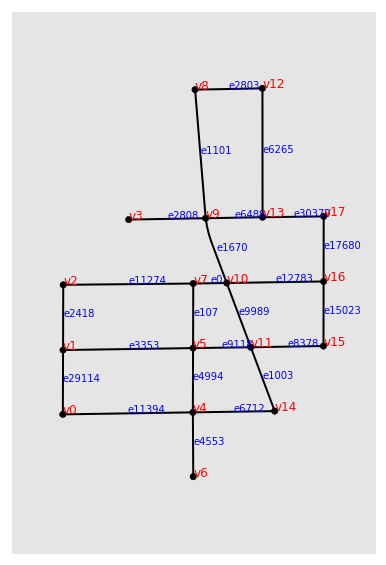

In [ ]:
from ensae_projects.data.data_geo_streets import plot_streets_network
plot_streets_network(edges_index, edges, vertices, shapes, figsize=(10,10))

## One solution

A solution is a set of indices of edges. Let's try ``edges_index`` without one edge as a solution.

In [ ]:
from ensae_projects.challenge.city_tour import distance_solution
solution = edges_index[:-1].copy()
try:
    distance_solution(edges_index, edges, distances, solution)
except Exception as e:
    print(type(e), str(e))

<class 'ensae_projects.challenge.city_tour.SolutionException'> Different number of distinct edges:
expected=24 got=23
Did you cover all the edges?


Let's try another one.

In [ ]:
solution = edges_index
try:
    distance_solution(edges_index, edges, distances, solution)
except Exception as e:
    print(type(e), str(e))

<class 'ensae_projects.challenge.city_tour.SolutionException'> Are you sure? The path is inconsistent. Some help:
[(1, 3), (3, 1), (6, 1), (7, 3), (13, 3), (16, 3)]


This probably means we need to go through a same edge several time.

In [ ]:
solution = edges_index + [17680, 30370, 12783, 0, 3353, 9118, 8378, 15023]
distance_solution(edges_index, edges, distances, solution)

0.04481876729332677

Let's plot the solution.

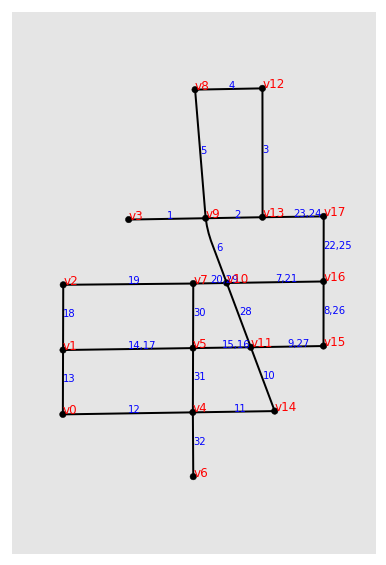

In [ ]:
from ensae_projects.challenge.city_tour import euler_path
path = euler_path(edges_index, edges, solution)
plot_streets_network(edges_index, edges, vertices, shapes, order=path, figsize=(10,10))